# **Tutorial 2: Reloading SIDISH model and Visualizing**

This tutorial covers the steps to reload a trained SIDISH model, extract cell embeddings, and visualize results using UMAP. Visualizing SIDISH outputs is essential for understanding high-risk cell distributions and their relationship to clinical outcomes.

### In this tutorial, you will:
- Reload the SIDISH model from a saved checkpoint.  
- Extract cell embeddings for downstream analysis.  
- Generate UMAP plots to visualize high-risk and background cell populations.  
- Adjust visualization parameters to improve cluster separation and highlight key cell populations.

### Outcome:
By the end of this tutorial, you will be able to explore and interpret SIDISH outputs, gaining insights into high-risk cell populations and their potential role in disease progression.

## **Step 1: Import libraries**

In [2]:
from SIDISH import SIDISH as sidish
import sys
import scanpy as sc
import pandas as pd
import numpy as np
import  torch
import random
import os
import matplotlib.pyplot as plt

/Users/admin/miniconda3/envs/sidish/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Set Seeds

In [3]:
seed = 0
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(1)
ite = 0
# Set seeds for reproducibility
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Call the seed setting function
set_seed(seed)

## **Step 2: Reload the saved data and SIDISH model**
### **2.1 Reload saved single-cell data**

In [4]:
path = "./LUNG/"
adata = sc.read_h5ad("{}adata_SIDISH.h5ad".format(path))

# Read survival+bulk dataset
bulk = pd.read_csv("../../DATA/processed_bulk.csv", index_col=0)

### **2.2 Reload trained SIDISH**

In [5]:
sdh = sidish(adata, bulk, "cpu", seed=ite)
sdh.init_Phase1(225, 20, 32, [512, 128], 512, "Adam", 1.0e-4, 1e-4, 0)
sdh.init_Phase2(500, 128, 1e-4, 0, 0.2, 256)
sdh.reload(path)

Reload Complete


## Step 3: Get cell embedding after SIDISH complete training

In [6]:
adata = sdh.getEmbedding()

## Step 4: Visualize the Cell Type composition or cell cluster

In [7]:
sdh.plot_CellType_UMAP()

KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

<Figure size 800x600 with 0 Axes>

## Step 5: Visualize the High-Risk cells identified by ***SIDISH***

################### Calculating Neighbors #################


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


################### Calculating UMAP coordinated #################
################### Leiden Clustering #################


/Users/admin/miniconda3/envs/sidish/lib/python3.10/site-packages/SIDISH/SIDISH.py:336: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(self.adata, resolution=resolution, random_state=self.seed)


################## Annotating Anndata #################
################## Plotting SIDISH identified High-Risk cells #################


<Figure size 800x600 with 0 Axes>

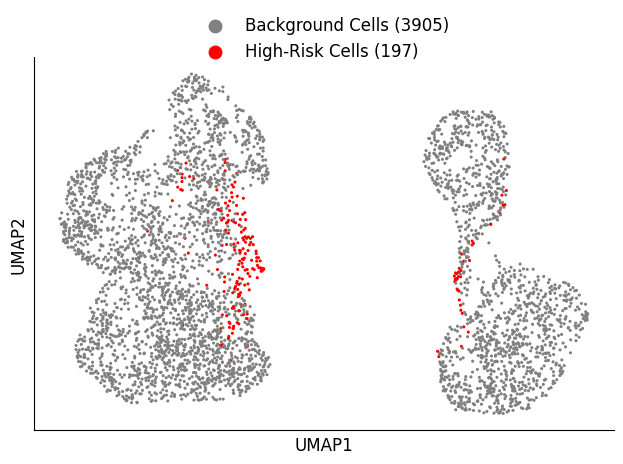

In [ ]:
sdh.plot_HighRisk_UMAP(resolution = 0.08)